Class:  9
 at confidence score:0.23


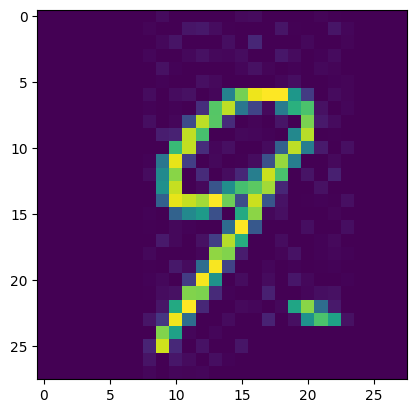

In [2]:
import matplotlib.pyplot as plt
from torchvision import transforms
import os
import io
import torch
from PIL import Image
# model = torch.load('mode.pth')
model = torch.jit.load('model_scripted.pt')
model.eval()

def transform_image(image_bytes):
    my_transforms = transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
    image = Image.open(io.BytesIO(image_bytes))
    return my_transforms(image).unsqueeze(0)
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
 
image_path="./Data_for_test/img_3.jpg"
image = plt.imread(image_path)

mean=[]

plt.imshow(image)
    
with open(image_path, 'rb') as f:
    image_bytes = f.read()

    tensor = transform_image(image_bytes=image_bytes)
    tensor=tensor.to(device)
    output = model.forward(tensor)
     
    probs = torch.nn.functional.softmax(output, dim=1)
    conf, classes = torch.max(probs, 1)
    print( 'Class: ',classes.item())
    print( ' at confidence score:{0:.2f}'.format(conf.item()))


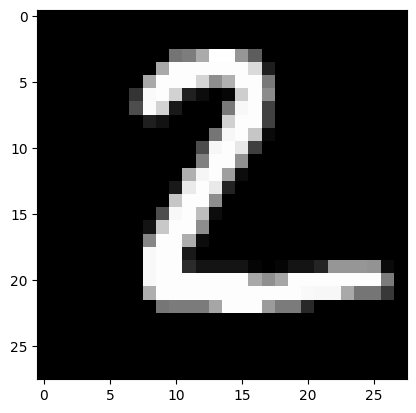

2


In [2]:
from matplotlib import pyplot as plt
import numpy as np
from torchvision import datasets, transforms
import torch

trans_mnist = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset_test = datasets.MNIST('../data/mnist/', train=False)

first_image,label = dataset_test.__getitem__(1) #.test.images[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(label)


In [3]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 3s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


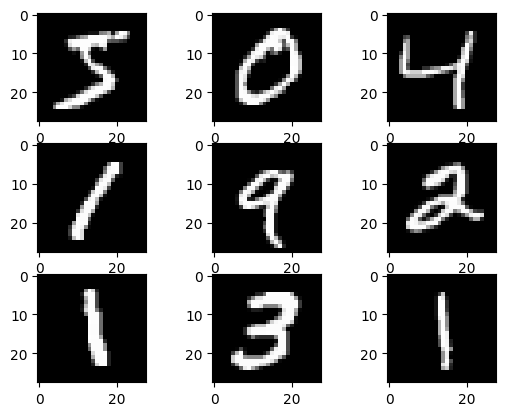

In [8]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    # pyplot.show()